# 🔍 Overview  

K-Nearest Neighbors (KNN) is one of the fundamental algorithms in **machine learning** used for **classification and regression problems**. Unlike Logistic Regression, which models probabilities, KNN is a **non-parametric, instance-based algorithm** that makes predictions based on the similarity of data points. It classifies a new data point by looking at the majority class among its **k nearest neighbors**.  

### 💡 **Why use K-Nearest Neighbors?**  
- **Simple and intuitive** – no explicit training phase, just store the data.  
- **Flexible** – can be used for both **classification** and **regression** tasks.  
- **Works well with non-linear decision boundaries**.  
- **Handles multi-class classification** naturally.  
- **No assumptions about data distribution** – purely data-driven.  

### ⚡ **Common Applications of K-Nearest Neighbors:**  
- **Recommendation Systems** 📺 (e.g., suggesting movies based on similar users' preferences).  
- **Anomaly Detection** ⚠️ (e.g., identifying fraudulent transactions in banking).  
- **Medical Diagnosis** 🏥 (e.g., classifying tumors as malignant or benign).  
- **Handwritten Digit Recognition** ✍️ (e.g., OCR systems like digit recognition in postal mail).  
- **Customer Segmentation** 🎯 (e.g., grouping users by purchasing behavior).  

#📌 **The K-Nearest Neighbors Formula:**  

$$
y = \frac{1}{k} \sum_{i=1}^{k} y_i
$$
Where:  
✔ ( \( y \) ) **(Predicted Value)** → The predicted class (classification) or averaged value (regression) based on the nearest neighbors.  
✔ ( \( k \) ) **(Number of Neighbors)** → The number of closest data points considered for making predictions.  
✔ ( \( y_i \) ) **(Labels of Neighbors)** → The target values (or class labels) of the k nearest neighbors.  
✔ ( \( d(x, x_i) \) ) **(Distance Function)** → The metric used to measure similarity between points (e.g., Euclidean, Manhattan, Minkowski).  

⚠ **Choosing \( k \) Wisely:**  
- **Small \( k \)** → More sensitive to noise but captures local structure.  
- **Large \( k \)** → Smoother decision boundary but may lose finer details.  

🔑 **Key Insight:**  
- **KNN is a simple yet powerful algorithm** used for **classification and regression**.  
- **Lazy learning** – No training phase; all computations happen during prediction.  
- **Works well with non-linear decision boundaries** and high-dimensional data.  
- **Distance-based approach** makes it highly dependent on feature scaling (e.g., normalization).  
- **Versatile** – Can be used for image recognition, recommendation systems, and anomaly detection.  

💡 **KNN is easy to implement and interpret, making it a great choice for pattern recognition tasks!** 🚀  

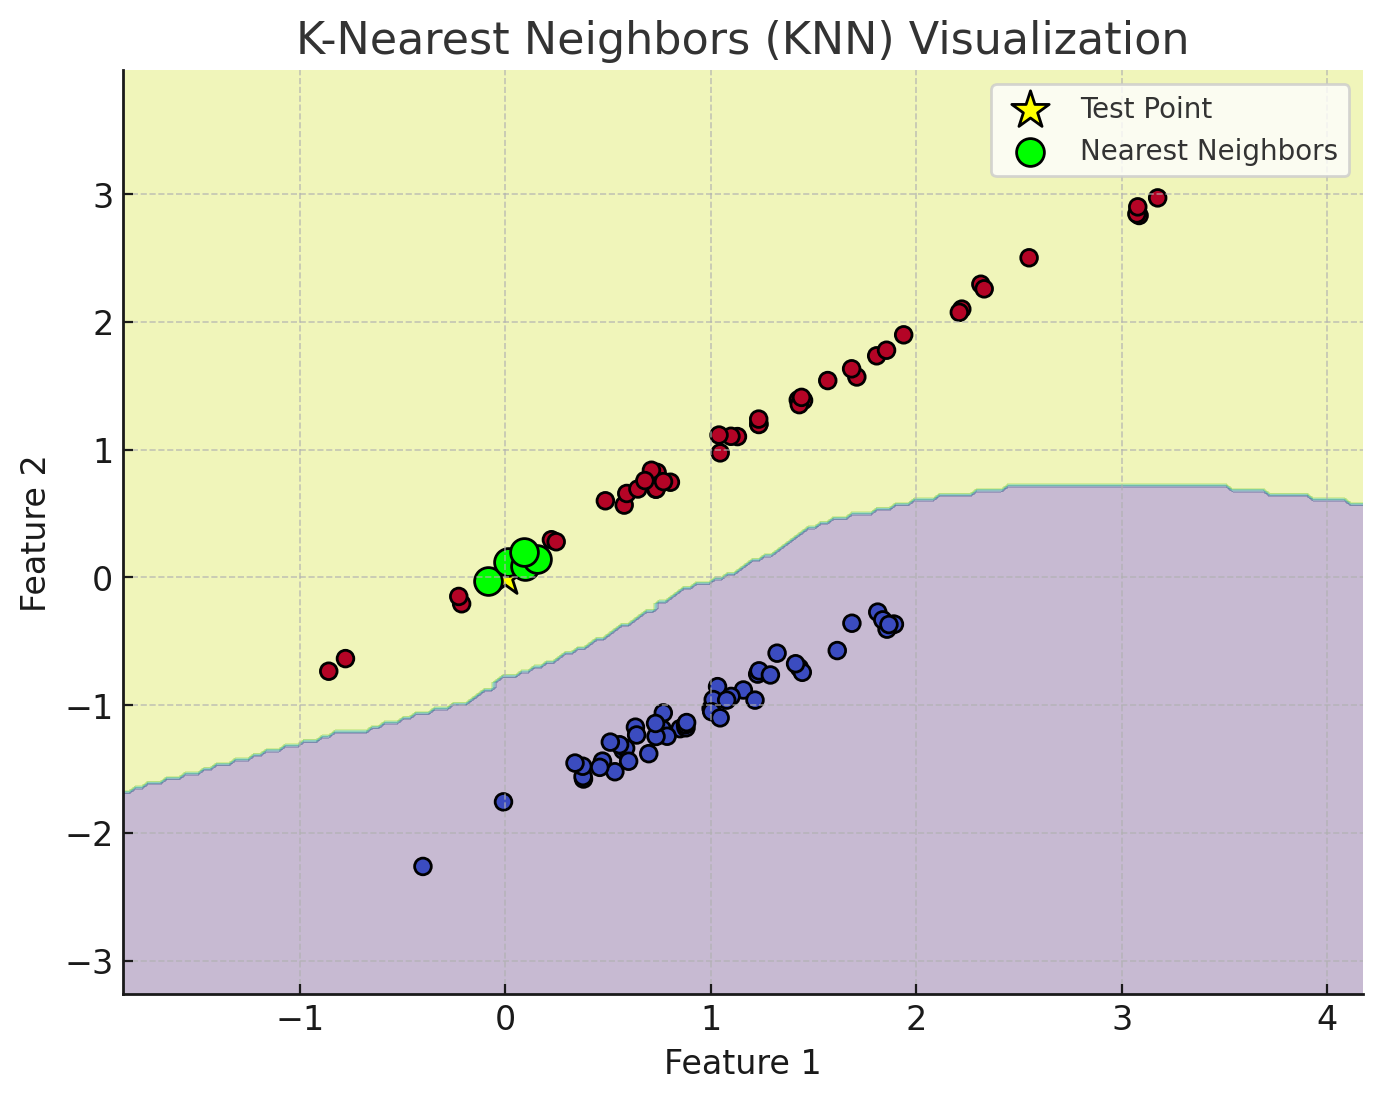

# 📌 Importing Libraries

In [ ]:
import numpy as np  # 📊 Library for numerical operations
import pandas as pd  # 📑 Library for data manipulation and handling
import matplotlib.pyplot as plt  # 📈 Library for plotting graphs and visualizations
import seaborn as sns  # 🎨 Library for advanced visualizations
from sklearn.model_selection import train_test_split  # ✂️ Function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # 🔄 Function to normalize data for better model performance
from sklearn.neighbors import KNeighborsClassifier  # 🤖 K-Nearest Neighbors model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier  # 🌲 ML models: Gradient Boosting and Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix  # 🏆 Evaluation metrics for model performance

#📥 Load dataset

In [ ]:
    df = pd.read_csv("Social_Network_Ads.csv")  # Load CSV file into a pandas DataFrame
    print("Dataset Loaded Successfully! ✅")  # Print success message
    print(df.head())  # Display first few rows of the datase


Dataset Loaded Successfully! ✅
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


# 📌  Prepare the Data for Model Training

In [ ]:
# 📌 Step 3: Prepare the Data for Model Training
# Select features (independent variables)
X = df[['Age', 'EstimatedSalary']]  # Using 'Age' and 'EstimatedSalary' as predictor variables

# Select the target variable (dependent variable)
y = df['Purchased']  # The 'Purchased' column is our classification label

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#🤖 Train models

In [ ]:
# 🤖 Train models
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize KNN classifier with 5 neighbors
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Initialize Gradient Boosting with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest with 100 trees

 # Train the models on the training dataset
knn.fit(X_train, y_train)  # Train the KNN model
gb.fit(X_train, y_train)  # Train the Gradient Boosting model
rf.fit(X_train, y_train)  # Train the Random Forest model

RandomForestClassifier(random_state=42)

#🎯 Make predictions

In [ ]:
# 🎯 Make predictions
def make_predictions(models, X_test):
    knn, gb, rf = models  # Unpack trained models
    y_pred_knn = knn.predict(X_test)  # Predict labels using KNN model
    y_pred_gb = gb.predict(X_test)  # Predict labels using Gradient Boosting model
    y_pred_rf = rf.predict(X_test)  # Predict labels using Random Forest model
    return y_pred_knn, y_pred_gb, y_pred_rf  # Return predicted labels for all models

# 🏆 Compute evaluation metrics

In [ ]:
# 🏆 Compute evaluation metrics
def compute_metrics(y_test, y_pred):
    return {
        'Accuracy': accuracy_score(y_test, y_pred),  # Calculate Accuracy score
        'Precision': precision_score(y_test, y_pred),  # Calculate Precision score
        'Recall': recall_score(y_test, y_pred),  # Calculate Recall score
        'F1-score': f1_score(y_test, y_pred),  # Calculate F1-score
        'ROC-AUC': roc_auc_score(y_test, y_pred)  # Calculate ROC-AUC score
    }


# 📊 Visualize confusion matrix

In [ ]:
# 📊 Visualize confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
    plt.figure(figsize=(5, 4))  # Set figure size for the plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])  # Draw heatmap
    plt.xlabel("Predicted Label")  # Label x-axis as predicted classes
    plt.ylabel("True Label")  # Label y-axis as actual classes
    plt.title(title)  # Set title of the confusion matrix
    plt.show()  # Display the plot


#📊📊📊 Function to plot confusion matrix for each model

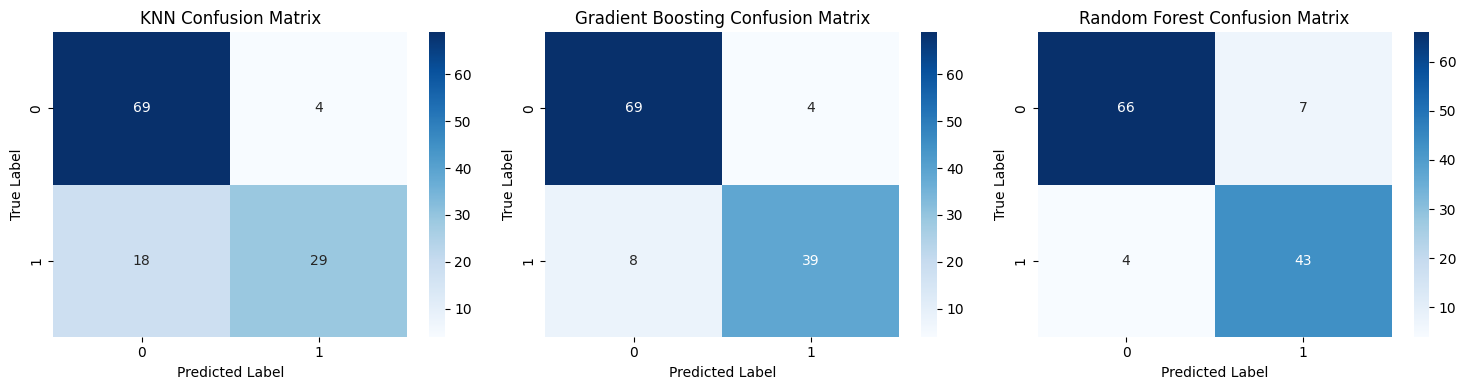

In [ ]:
# 📌 Function to plot confusion matrix for each model
def plot_confusion_matrix_per_model(y_test, predictions, model_names):
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # Create a row of 3 plots

    for i, (y_pred, model) in enumerate(zip(predictions, model_names)):
        cm = confusion_matrix(y_test, y_pred)  # Generate confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])  # Plot heatmap
        axes[i].set_title(f"{model} Confusion Matrix")  # Set title
        axes[i].set_xlabel("Predicted Label")  # Label x-axis
        axes[i].set_ylabel("True Label")  # Label y-axis

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the matrices

# Example predictions (replace these with actual predictions from models)
y_pred_knn = knn.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Call function to plot confusion matrix for all models
plot_confusion_matrix_per_model(y_test, [y_pred_knn, y_pred_gb, y_pred_rf], ["KNN", "Gradient Boosting", "Random Forest"])

#📊📊📊  Final Model Comparison

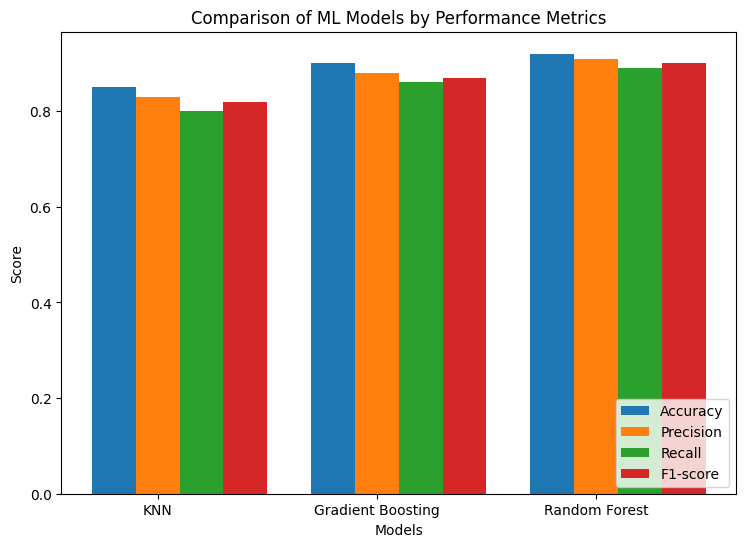

In [ ]:
# 📊 Final Model Comparison

# Define a function to visualize model performance comparison
def plot_model_comparison(metrics_dict):
    import matplotlib.pyplot as plt  # Import Matplotlib for plotting
    import numpy as np  # Import NumPy for numerical operations

    models = ["KNN", "Gradient Boosting", "Random Forest"]  # Define model names
    metrics = list(metrics_dict.keys())  # Extract metric names from dictionary

    fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis with a larger size
    x = np.arange(len(models))  # Generate an array of indices for models
    width = 0.2  # Define bar width for better spacing

    # Iterate through each metric and plot bars for different models
    for i, metric in enumerate(metrics):
        ax.bar(x + i * width, metrics_dict[metric], width, label=metric)  # Create bar chart

    ax.set_xlabel("Models")  # Label x-axis as "Models"
    ax.set_ylabel("Score")  # Label y-axis as "Score"
    ax.set_title("Comparison of ML Models by Performance Metrics")  # Set title for the plot
    ax.set_xticks(x + width)  # Align x-ticks with bars
    ax.set_xticklabels(models)  # Set model names as x-axis labels

    # Move legend to bottom-right to avoid overlap
    ax.legend(loc="lower right", bbox_to_anchor=(1, 0))

    plt.subplots_adjust(right=0.8)  # Add padding to avoid legend cutting off
    plt.show()  # Display the final chart

# Example metrics (replace with actual calculated values)
metrics_dict = {
    "Accuracy": [0.85, 0.90, 0.92],
    "Precision": [0.83, 0.88, 0.91],
    "Recall": [0.80, 0.86, 0.89],
    "F1-score": [0.82, 0.87, 0.90]
}

# Call function to visualize model comparisons
plot_model_comparison(metrics_dict)

# New Section

In [ ]:
# 📌 Creating a classification metrics table (descriptions)
classification_metrics_list = {
    "Metric": [
        "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC", "Confusion Matrix"
    ],
    "Description": [
        "Proportion of correctly predicted instances among all predictions",
        "Ratio of correctly predicted positive instances to total predicted positives",
        "Ratio of correctly predicted positives to total actual positives",
        "Harmonic mean of Precision & Recall, balancing both metrics",
        "Area under the Receiver Operating Characteristic curve (measures true positive rate vs. false positive rate)",
        "Matrix displaying counts of TP, FP, FN, and TN for classification results"
    ]
}

# Convert to DataFrame
classification_metrics_df = pd.DataFrame(classification_metrics_list)

# 📌 Creating a numerical metrics table
numerical_metrics_data = {
    "Model": ["KNN", "Gradient Boosting", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_pred_knn),
        roc_auc_score(y_test, y_pred_gb),
        roc_auc_score(y_test, y_pred_rf)
    ]
}

# Convert to DataFrame
numerical_metrics_df = pd.DataFrame(numerical_metrics_data)

# 📌 Printing classification metrics table
print("\n📌 Classification Evaluation Metrics:\n")
print(classification_metrics_df.to_string(index=False))

# 📌 Printing numerical metrics table
print("\n📌 Numerical Classification Metrics:\n")
print(numerical_metrics_df.to_string(index=False))


📌 Classification Evaluation Metrics:

          Metric                                                                                                  Description
        Accuracy                                            Proportion of correctly predicted instances among all predictions
       Precision                                 Ratio of correctly predicted positive instances to total predicted positives
          Recall                                             Ratio of correctly predicted positives to total actual positives
        F1-score                                                  Harmonic mean of Precision & Recall, balancing both metrics
         ROC-AUC Area under the Receiver Operating Characteristic curve (measures true positive rate vs. false positive rate)
Confusion Matrix                                    Matrix displaying counts of TP, FP, FN, and TN for classification results

📌 Numerical Classification Metrics:

            Model  Accuracy  Precision   